

# Prac 06.1

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.



### Step 0

Run the necessary imports.


In [ ]:
!pip install dlib

In [3]:
import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Step 1

Load an image (any image that contains faces).

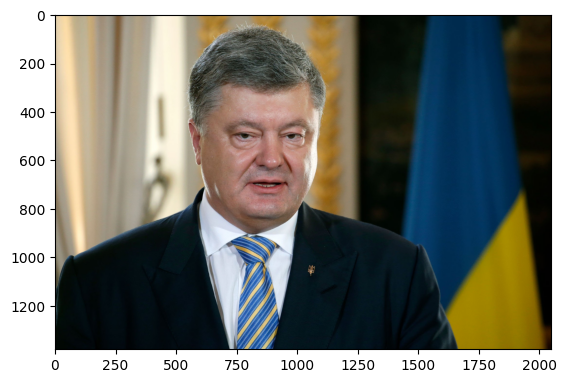

In [ ]:
img = cv2.imread('/poroh.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img )

### Step 2

Load the dlib face predictor.

In [ ]:
import requests
url = 'https://huggingface.co/datasets/navagg/PyVHR/resolve/main/shape_predictor_68_face_landmarks.dat'
predictor_path = 'shape_predictor_68_face_landmarks.dat'


try:
    with open(predictor_path, 'rb') as f:
        print(f"{predictor_path} already exists.")
except FileNotFoundError:
    response = requests.get(url)
    with open(predictor_path, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {predictor_path}')

Downloaded shape_predictor_68_face_landmarks.dat


In [ ]:

predictor_path = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)


detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [ ]:
faces = detector(img)

for face in faces:

    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


    landmarks = predictor(img, face)
    for n in range(0, 68):
        x_point = landmarks.part(n).x
        y_point = landmarks.part(n).y
        cv2.circle(img, (x_point, y_point), 1, (255, 0, 0), -1)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

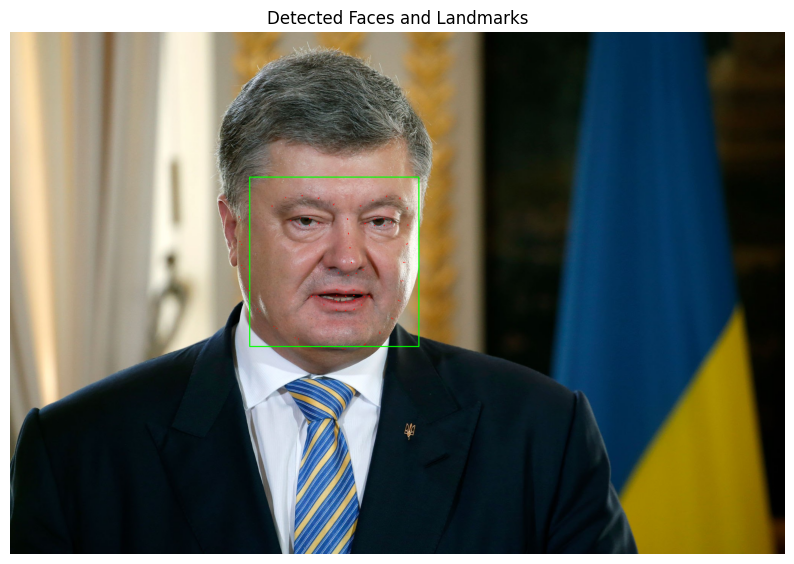

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title('Detected Faces and Landmarks')
plt.show()

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

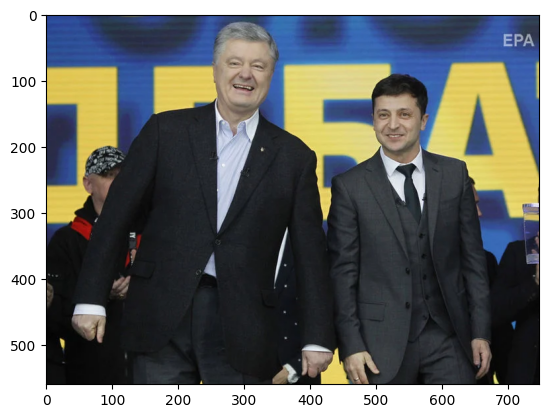

In [ ]:
img_2 = cv2.imread('/debats.webp')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [ ]:
faces = detector(img_2)

for face in faces:

    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img_2, (x, y), (x + w, y + h), (0, 255, 0), 2)


    landmarks = predictor(img_2, face)
    for n in range(0, 68):
        x_point = landmarks.part(n).x
        y_point = landmarks.part(n).y
        cv2.circle(img_2, (x_point, y_point), 1, (255, 0, 0), -1)

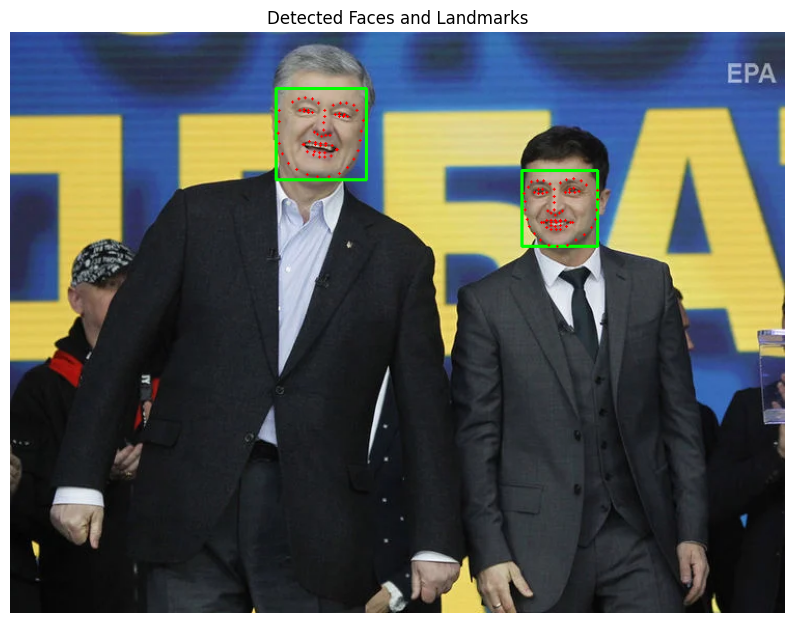

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img_2)
plt.axis('off')  # Hide axes
plt.title('Detected Faces and Landmarks')
plt.show()